# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/result_clus_df.csv'
df = pd.read_csv(path)
df.head()

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year,cluster
0,Wildfire,Brazil,6.267393,9706,6.509790e+08,1,2024,2
1,Hurricane,Indonesia,6.649358,2233,5.538357e+08,1,2024,3
2,Tornado,China,9.724366,478,6.910998e+07,1,2024,2
3,Flood,India,1.702505,2867,8.474880e+08,1,2024,0
4,Flood,Brazil,7.917748,776,6.449297e+08,1,2024,0


# **3. Data Splitting**

In [29]:
X = df.drop('cluster', axis=1)
y = df['cluster']

In [30]:
X.head()

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year
0,Wildfire,Brazil,6.267393,9706,6.509790e+08,1,2024
1,Hurricane,Indonesia,6.649358,2233,5.538357e+08,1,2024
2,Tornado,China,9.724366,478,6.910998e+07,1,2024
3,Flood,India,1.702505,2867,8.474880e+08,1,2024
4,Flood,Brazil,7.917748,776,6.449297e+08,1,2024


In [31]:
y.head()

,cluster
0,2
1,3
2,2
3,0
4,0


Melakukan transformasi data

In [33]:
category_features = X.select_dtypes(include=['object']).columns

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
X = pd.DataFrame(X)

for col in category_features:
    X[col] = label_encoder.fit_transform(X[col])

# Menampilkan hasil
X

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year
0,4,0,6.267393,9706,6.509790e+08,1,2024
1,2,3,6.649358,2233,5.538357e+08,1,2024
2,3,1,9.724366,478,6.910998e+07,1,2024
3,1,2,1.702505,2867,8.474880e+08,1,2024
4,1,0,7.917748,776,6.449297e+08,1,2024
...,...,...,...,...,...,...,...
9995,2,1,3.092801,7837,1.067089e+07,2,2025
9996,3,0,6.652682,6288,1.414537e+08,2,2025
9997,0,3,6.824656,673,8.330828e+08,2,2025
9998,1,5,6.381571,323,9.502971e+08,2,2025


In [34]:
# Standarisasi dengan Standard Scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year
0,1.418707,-1.444076,0.270398,1.627973,0.510292,-1.34109,-0.372067
1,0.008041,0.305612,0.416232,-0.948951,0.170770,-1.34109,-0.372067
2,0.713374,-0.860846,1.590270,-1.554130,-1.523375,-1.34109,-0.372067
3,-0.697293,-0.277617,-1.472476,-0.730328,1.197103,-1.34109,-0.372067
4,-0.697293,-1.444076,0.900504,-1.451370,0.489149,-1.34109,-0.372067


Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 7), (2000, 7), (8000,), (2000,))

In [36]:
X_train.head()

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year
9254,-0.697293,-0.860846,-1.184001,0.075198,-0.054873,-1.341090,2.687691
1561,-1.402626,-0.860846,1.571245,0.843827,1.411592,-0.792632,-0.372067
1670,-0.697293,-0.860846,0.559364,-0.468946,-0.372364,-0.792632,-0.372067
6087,-1.402626,1.472071,1.254104,1.124519,1.620487,0.852743,-0.372067
6669,0.008041,0.305612,-0.706819,1.424178,-0.729992,1.126972,-0.372067


In [37]:
y_train.head()

,cluster
9254,1
1561,0
1670,0
6087,0
6669,3


In [38]:
X_test.head()

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year
6252,1.418707,-0.860846,0.084201,-1.098263,0.528452,0.852743,-0.372067
4684,0.008041,0.888841,0.976033,-1.636545,0.852633,0.304285,-0.372067
1731,-0.697293,0.305612,0.809722,1.535558,-0.500737,-0.792632,-0.372067
4742,-0.697293,0.888841,1.308664,0.755550,0.468122,0.304285,-0.372067
4521,-1.402626,-1.444076,1.084783,0.601065,-0.161851,0.304285,-0.372067


In [39]:
y_test.head()

,cluster
6252,2
4684,3
1731,0
4742,0
4521,0


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [40]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [51]:
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train, y_train)

GaussianNB()

Penjelasan singkat mengenai algoritma yang digunakan, yaitu **KNN**, **Decision Tree**, **Random Forest**, **SVM**, dan **Naive Bayes**:

### 1. **K-Nearest Neighbors (KNN)**
- **Cara Kerja**: KNN adalah algoritma berbasis instance yang bekerja dengan cara membandingkan titik data baru dengan data yang sudah ada. Data baru diklasifikasikan berdasarkan mayoritas kelas dari **k tetangga terdekat**.
- **Proses**: Ketika ada data baru, algoritma menghitung jarak (misalnya, Euclidean) antara data tersebut dan data pelatihan, kemudian memilih `k` tetangga terdekat. Kelas dengan jumlah terbanyak di antara tetangga tersebut menjadi prediksi.
- **Keunggulan**: Sederhana dan efektif untuk dataset kecil.
- **Kelemahan**: Kinerja bisa lambat untuk dataset besar dan sensitif terhadap data yang tidak seimbang.

### 2. **Decision Tree**
- **Cara Kerja**: Decision Tree adalah model berbasis pohon yang memecah data berdasarkan fitur-fitur yang memberikan **pemisahan terbaik** (misalnya, berdasarkan pengurangan entropi atau Gini index).
- **Proses**: Algoritma membangun pohon keputusan di mana setiap node mengajukan pertanyaan tentang satu fitur, dan berdasarkan jawabannya, data dipisahkan ke cabang yang berbeda. Proses ini berlanjut sampai pohon mencapai node daun, yang memberikan prediksi.
- **Keunggulan**: Mudah dipahami dan diinterpretasikan, serta bekerja baik untuk dataset yang memiliki hubungan non-linear.
- **Kelemahan**: Rentan terhadap overfitting jika pohon terlalu dalam.

### 3. **Random Forest**
- **Cara Kerja**: Random Forest adalah versi yang lebih kuat dari Decision Tree yang menggunakan **beberapa pohon keputusan** (biasanya ratusan) untuk membuat prediksi.
- **Proses**: Algoritma membangun banyak Decision Trees dari subset data (dengan *bootstrapping*) dan subset fitur, kemudian melakukan agregasi dari prediksi semua pohon (melalui mayoritas voting untuk klasifikasi atau rata-rata untuk regresi).
- **Keunggulan**: Mengurangi overfitting dibandingkan Decision Tree dan bekerja baik untuk berbagai tipe data.
- **Kelemahan**: Bisa lebih lambat dalam prediksi dan membutuhkan lebih banyak memori karena banyaknya pohon.

### 4. **Support Vector Machine (SVM)**
- **Cara Kerja**: SVM bekerja dengan menemukan **hyperplane terbaik** yang memisahkan kelas-kelas dalam data.
- **Proses**: Algoritma memaksimalkan margin antara kelas-kelas yang berbeda dengan cara menentukan garis atau hyperplane optimal yang memisahkan kelas. SVM juga dapat menggunakan kernel trick untuk menangani kasus yang tidak dapat dipisahkan secara linear.
- **Keunggulan**: Sangat efektif dalam data berdimensi tinggi dan bekerja baik untuk klasifikasi linear dan non-linear.
- **Kelemahan**: Memerlukan tuning parameter dan mungkin tidak bekerja baik dengan dataset besar atau data yang terlalu bising.

### 5. **Naive Bayes**
- **Cara Kerja**: Naive Bayes adalah algoritma berbasis probabilitas yang menggunakan **Teorema Bayes** dengan asumsi bahwa fitur-fitur bersifat **independen** satu sama lain.
- **Proses**: Algoritma menghitung probabilitas setiap kelas berdasarkan distribusi fitur dan memilih kelas dengan probabilitas terbesar. Ia bekerja dengan asumsi "naive" bahwa setiap fitur berkontribusi secara independen terhadap keputusan akhir.
- **Keunggulan**: Cepat, sederhana, dan bekerja baik untuk data teks dan klasifikasi multikelas.
- **Kelemahan**: Asumsi independensi sering kali tidak realistis dalam banyak kasus, yang bisa mengurangi akurasi model.

Masing-masing algoritma memiliki kekuatan dan kelemahan yang berbeda, tergantung pada sifat data dan masalah yang dihadapi.

## **b. Evaluasi Model Klasifikasi**

Evaluasi pada data train

In [73]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil evaluasi
def evaluate_model_train(model, X_train, y_train):
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_train, y_pred),
        # Precision, recall, dan f1-score harus disesuaikan dengan klasifikasi multi-kelas
        'Precision': precision_score(y_train, y_pred, average='macro'),  # Menggunakan macro average
        'Recall': recall_score(y_train, y_pred, average='macro'),        # Menggunakan macro average
        'F1-Score': f1_score(y_train, y_pred, average='macro')           # Menggunakan macro average
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model_train(knn_model, X_train, y_train),
    'Decision Tree (DT)': evaluate_model_train(decision_tree_model, X_train, y_train),
    'Random Forest (RF)': evaluate_model_train(random_forest_model, X_train, y_train),
    'Support Vector Machine (SVM)': evaluate_model_train(svm_model, X_train, y_train),
    'Naive Bayes (NB)': evaluate_model_train(gaussian_nb_model, X_train, y_train)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)    0.9965   0.997039  0.995307   0.99616
1            Decision Tree (DT)    1.0000   1.000000  1.000000   1.00000
2            Random Forest (RF)    1.0000   1.000000  1.000000   1.00000
3  Support Vector Machine (SVM)    1.0000   1.000000  1.000000   1.00000
4              Naive Bayes (NB)    1.0000   1.000000  1.000000   1.00000


Evaluasi pada data test

In [72]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil evaluasi
def evaluate_model_test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        # Precision, recall, dan f1-score harus disesuaikan dengan klasifikasi multi-kelas
        'Precision': precision_score(y_test, y_pred, average='macro'),  # Menggunakan macro average
        'Recall': recall_score(y_test, y_pred, average='macro'),        # Menggunakan macro average
        'F1-Score': f1_score(y_test, y_pred, average='macro')           # Menggunakan macro average
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model_test(knn_model, X_test, y_test),
    'Decision Tree (DT)': evaluate_model_test(decision_tree_model, X_test, y_test),
    'Random Forest (RF)': evaluate_model_test(random_forest_model, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model_test(svm_model, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model_test(gaussian_nb_model, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)    0.9885   0.990865  0.984865  0.987701
1            Decision Tree (DT)    1.0000   1.000000  1.000000  1.000000
2            Random Forest (RF)    1.0000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)    1.0000   1.000000  1.000000  1.000000
4              Naive Bayes (NB)    1.0000   1.000000  1.000000  1.000000


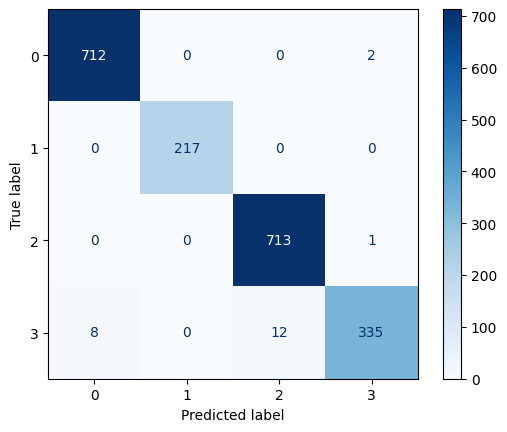

In [67]:
y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

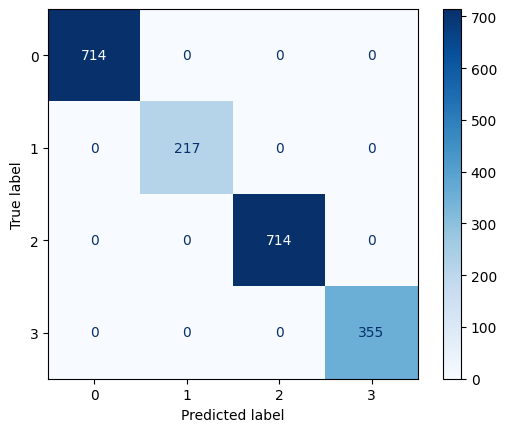

In [68]:
y_pred = decision_tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

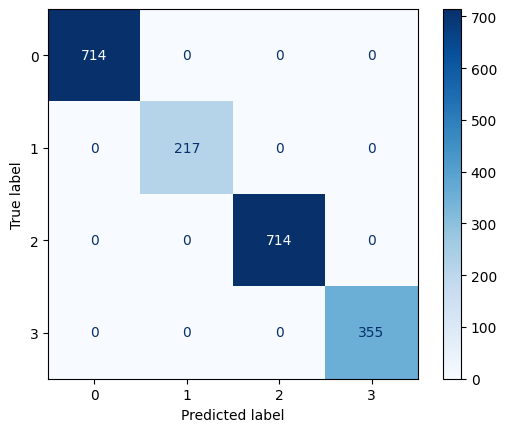

In [69]:
y_pred = random_forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

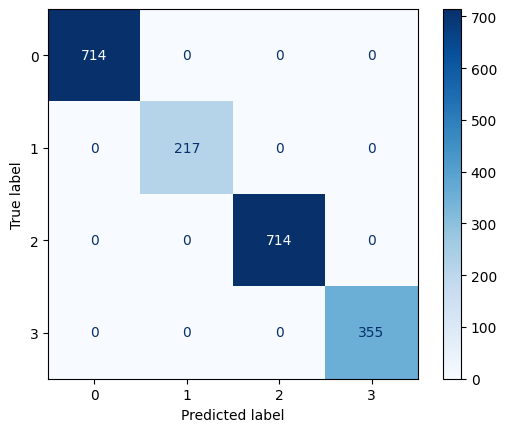

In [70]:
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

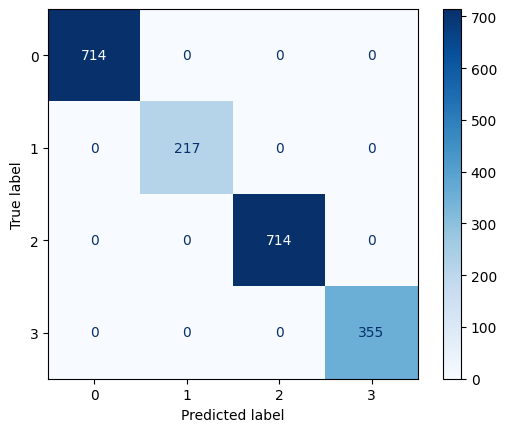

In [71]:
y_pred = gaussian_nb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Hasil evaluasi pada KNN sedikit lebih buruk jika dibandingkan dengan model lain, seperti decision tree, random forest, SVM dan Naive Bayes yang mempunyai nilai 100% pada semua metriknya

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

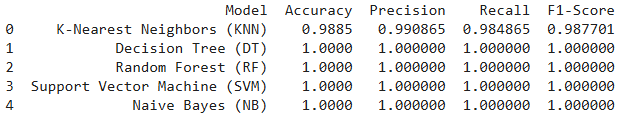



1.   **K-Nears Neighbors (KNN)** menunjukkan akurasi sebesar 98.85%. Memiliki precision 98.08%, recall 98.48% dan F1-Score 98.77%. Nilai recall yang lebih baik menunjukkan bahwa model lebih baik dalam mendeteksi positif yang sebenarnya (True Positives), tetapi mungkin melakukan lebih banyak kesalahan dengan prediksi positif palsu (False Positives).
2.   **Decision Tree (DT)** menunjukkan akurasi, precesion, recall dan F1-Score memiliki nilai 100%. Hal ini menunjukkan bahwa predeksi yang dilakukan model bisa dikatakan sempurna.
3.   **Random Forest (RF)** juga menunjukkan akurasi, precesion, recall dan F1-Score memiliki nilai 100%. Sama seperti sebelumnya, hal ini menunjukkan bahwa predeksi yang dilakukan model bisa dikatakan sempurna.
4.   **Support Vector Machine (SVM)** ikut menunjukkan akurasi, precesion, recall dan F1-Score memiliki nilai 100%. Hal ini juga menunjukkan bahwa predeksi yang dilakukan oleh model bisa dikatakan sempurna.
5.   **Naive Bayes (NB)** sama-sama menunjukkan akurasi, precesion, recall dan F1-Score memiliki nilai 100%. Nilai ini menunjukkan bahwa predeksi yang dilakukan oleh model dapat dinyatakan sempurna.

Namun, hasil 100% di hampir semua metrik model bisa jadi mencurigakan. Bisa saja terjadi data leakage, overfitting, atau ketidakseimbangan data yang memengaruhi hasil tersebut. Hasil sempurna memang mungkin, tetapi jarang terjadi dalam skenario yang kompleks dan realistis.
